# Fleming Pipeline - ipython notebook version

### Note on astrometry.net 

Shouldn't need a key to find RA/DEC coordinates since `force_upload=False`.

If the solve keeps timing out and you have `Config.astrometry_timeout` as a large value (or `-1`) then check the timeout in `~/.astroquery/config/astroquery.cfg`.


#### How to get a key
If you do want to upload (eg if machine takes too long solving) you will need a key and add it to `~/.astroquery/config/astroquery.cfg` and `pipeline/astrometry_api_key.txt`.
The first is a config file (example layout is as below) latter is just a text file containing the key and nothing else.

[Go to the website](http://nova.astrometry.net/api_help) and sign in and follow the instructions.

Example config:
```
[astrometry_net]

api_key = XXXXX
timeout = 1200 ## 20 mins
server = http://npva.astrometry.net
```

## General imports and setup
Run this, change the config cell to suit the field that you want to run for.

In [1]:
%load_ext autoreload
%autoreload 2

## Imports
import pipeline
from pipeline import *
from pipeline import Pipeline

from datetime import datetime
import os

In [2]:
# REMOVE ME WHEN NOT USING DARK MODE
import matplotlib as mpl
COLOR = "white"
#COLOR = "black"
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

## A4 paper
mpl.rcParams['figure.figsize'] = [11.3, 8.7]

In [3]:
config = Config(
    raw_image_dir = os.path.expanduser("~/mnt/jgt/2022/0301"),
    image_prefix = "l138_0",
    bias_prefix = "bias",
    n_sets = 9,
    fits_extension = ".fits",
    fits_date_format = "%Y.%m.%dT%H:%M:%S.%f",
    has_filter_in_header = False,
    n_sample_periods = 100,
    amplitude_score_threshold = 0.85,
)

## Run the pipeline
Run using the general setup from `pipeline/Pipeline.py`.

In [ ]:
Pipeline.run(config, show_plots=True, show_errors=False)

## Pipeline breakdown
Below is a rough copy of the `Pipeline.run()` method.

Used for picking certain parts to run/rerun.
Hopefully minimal kernel restarts are needed when running.

In [ ]:
r = Reducer(config, "No filter") ## Only "No filter" for Trius

r.reduce(skip_existing=True)

In [4]:
c = Cataloguer(config)

catalogue_image = os.path.join(config.image_dir, config.image_format_str.format(1, 1))

In [5]:
#n_sources = c.generate_catalogue(catalogue_image, solve=True)
#c.generate_image_times()

n_sources = c.generate_catalogue(catalogue_image, solve=False)

[Cataloguer] Filtered out 0 objects
[Cataloguer] Found 1743 suitable sources
[Cataloguer] Getting coordinate system for image './workspace/../images/r_l138_0_1_001.fits'


In [ ]:
sf = ShiftFinder(config, n_sources)

sf.generate_shifts()

In [6]:
ff = FluxFinder(config, n_sources)

In [ ]:
ff.make_light_curves()

In [ ]:
da = DataAnalyser(config, adjusted=False)

In [ ]:
mean, std, med, n_positive = da.get_means_and_stds()
da.plot_means_and_stds()
source_ids = da.get_source_ids()

In [ ]:
vd = VariableDetector(config, source_ids, mean, std, med, n_positive, adjusted=False)
exclude_from_avg = vd.std_dev_search(config.avg_exclude_threshold)
avg_ids = da.get_ids_for_avg(exclude_ids)

In [ ]:
da.make_avg_curve(avg_ids)
ff.plot_avg_light_curve(config.avg_curve_path, show=True)

In [ ]:
ff.create_adjusted_light_curves()

In [7]:
da = DataAnalyser(config, adjusted=True)
mean, std, med, n_positive = da.get_means_and_stds()
da.plot_means_and_stds()
source_ids = da.get_source_ids()

In [8]:
vd = VariableDetector(config, source_ids, mean, std, med, n_positive, adjusted=True)

In [11]:
variable_ids_s = vd.std_dev_search(config.variability_threshold)
variable_ids_a = vd.amplitude_search(config.amplitude_score_threshold)
variable_ids = variable_ids_a

[VariableDetector] std search: Found 114 variables out of 1743 sources
[VariableDetector] Finding period for source 0/1743
[VariableDetector] Finding period for source 1/1743
[VariableDetector] Finding period for source 2/1743
[VariableDetector] Finding period for source 3/1743
[VariableDetector] Finding period for source 4/1743
[VariableDetector] Finding period for source 5/1743
[VariableDetector] Finding period for source 6/1743
[VariableDetector] Finding period for source 7/1743
[VariableDetector] Finding period for source 8/1743
[VariableDetector] Finding period for source 9/1743
[VariableDetector] Finding period for source 10/1743
[VariableDetector] Finding period for source 11/1743
[VariableDetector] Finding period for source 12/1743
[VariableDetector] Finding period for source 13/1743
[VariableDetector] Finding period for source 14/1743
[VariableDetector] Finding period for source 15/1743
[VariableDetector] Finding period for source 16/1743
[VariableDetector] Finding period for 

[VariableDetector] Finding period for source 153/1743
[VariableDetector] Finding period for source 154/1743
[VariableDetector] Finding period for source 155/1743
[VariableDetector] Finding period for source 156/1743
[VariableDetector] Finding period for source 157/1743
[VariableDetector] Finding period for source 158/1743
[VariableDetector] Finding period for source 159/1743
[VariableDetector] Finding period for source 160/1743
[VariableDetector] Finding period for source 161/1743
[VariableDetector] Finding period for source 162/1743
[VariableDetector] Finding period for source 163/1743
[VariableDetector] Finding period for source 164/1743
[VariableDetector] Finding period for source 165/1743
[VariableDetector] Finding period for source 166/1743
[VariableDetector] Finding period for source 167/1743
[VariableDetector] Finding period for source 168/1743
[VariableDetector] Finding period for source 169/1743
[VariableDetector] Finding period for source 170/1743
[VariableDetector] Finding p

[VariableDetector] Finding period for source 305/1743
[VariableDetector] Finding period for source 306/1743
[VariableDetector] Finding period for source 307/1743
[VariableDetector] Finding period for source 308/1743
[VariableDetector] Finding period for source 309/1743
[VariableDetector] Finding period for source 310/1743
[VariableDetector] Finding period for source 311/1743
[VariableDetector] Finding period for source 312/1743
[VariableDetector] Finding period for source 313/1743
[VariableDetector] Finding period for source 314/1743
[VariableDetector] Finding period for source 315/1743
[VariableDetector] Finding period for source 316/1743
[VariableDetector] Finding period for source 317/1743
[VariableDetector] Finding period for source 318/1743
[VariableDetector] Finding period for source 319/1743
[VariableDetector] Finding period for source 320/1743
[VariableDetector] Finding period for source 321/1743
[VariableDetector] Finding period for source 322/1743
[VariableDetector] Finding p

[VariableDetector] Finding period for source 457/1743
[VariableDetector] Finding period for source 458/1743
[VariableDetector] Finding period for source 459/1743
[VariableDetector] Finding period for source 460/1743
[VariableDetector] Finding period for source 461/1743
[VariableDetector] Finding period for source 462/1743
[VariableDetector] Finding period for source 463/1743
[VariableDetector] Finding period for source 464/1743
[VariableDetector] Finding period for source 465/1743
[VariableDetector] Finding period for source 466/1743
[VariableDetector] Finding period for source 467/1743
[VariableDetector] Finding period for source 468/1743
[VariableDetector] Finding period for source 469/1743
[VariableDetector] Finding period for source 470/1743
[VariableDetector] Finding period for source 471/1743
[VariableDetector] Finding period for source 472/1743
[VariableDetector] Finding period for source 473/1743
[VariableDetector] Finding period for source 474/1743
[VariableDetector] Finding p

[VariableDetector] Finding period for source 609/1743
[VariableDetector] Finding period for source 610/1743
[VariableDetector] Finding period for source 611/1743
[VariableDetector] Finding period for source 612/1743
[VariableDetector] Finding period for source 613/1743
[VariableDetector] Finding period for source 614/1743
[VariableDetector] Finding period for source 615/1743
[VariableDetector] Finding period for source 616/1743
[VariableDetector] Finding period for source 617/1743
[VariableDetector] Finding period for source 618/1743
[VariableDetector] Finding period for source 619/1743
[VariableDetector] Finding period for source 620/1743
[VariableDetector] Finding period for source 621/1743
[VariableDetector] Finding period for source 622/1743
[VariableDetector] Finding period for source 623/1743
[VariableDetector] Finding period for source 624/1743
[VariableDetector] Finding period for source 625/1743
[VariableDetector] Finding period for source 626/1743
[VariableDetector] Finding p

[VariableDetector] Finding period for source 764/1743
[VariableDetector] Finding period for source 765/1743
[VariableDetector] Finding period for source 766/1743
[VariableDetector] Finding period for source 767/1743
[VariableDetector] Finding period for source 768/1743
[VariableDetector] Finding period for source 769/1743
[VariableDetector] Finding period for source 770/1743
[VariableDetector] Finding period for source 771/1743
[VariableDetector] Finding period for source 772/1743
[VariableDetector] Finding period for source 773/1743
[VariableDetector] Finding period for source 774/1743
[VariableDetector] Finding period for source 775/1743
[VariableDetector] Finding period for source 776/1743
[VariableDetector] Finding period for source 777/1743
[VariableDetector] Finding period for source 778/1743
[VariableDetector] Finding period for source 779/1743
[VariableDetector] Finding period for source 780/1743
[VariableDetector] Finding period for source 781/1743
[VariableDetector] Finding p

[VariableDetector] Finding period for source 916/1743
[VariableDetector] Finding period for source 917/1743
[VariableDetector] Finding period for source 918/1743
[VariableDetector] Finding period for source 919/1743
[VariableDetector] Finding period for source 920/1743
[VariableDetector] Finding period for source 921/1743
[VariableDetector] Finding period for source 922/1743
[VariableDetector] Finding period for source 923/1743
[VariableDetector] Finding period for source 924/1743
[VariableDetector] Finding period for source 925/1743
[VariableDetector] Finding period for source 926/1743
[VariableDetector] Finding period for source 927/1743
[VariableDetector] Finding period for source 928/1743
[VariableDetector] Finding period for source 929/1743
[VariableDetector] Finding period for source 930/1743
[VariableDetector] Finding period for source 931/1743
[VariableDetector] Finding period for source 932/1743
[VariableDetector] Finding period for source 933/1743
[VariableDetector] Finding p

[VariableDetector] Finding period for source 1067/1743
[VariableDetector] Finding period for source 1068/1743
[VariableDetector] Finding period for source 1069/1743
[VariableDetector] Finding period for source 1070/1743
[VariableDetector] Finding period for source 1071/1743
[VariableDetector] Finding period for source 1072/1743
[VariableDetector] Finding period for source 1073/1743
[VariableDetector] Finding period for source 1074/1743
[VariableDetector] Finding period for source 1075/1743
[VariableDetector] Finding period for source 1076/1743
[VariableDetector] Finding period for source 1077/1743
[VariableDetector] Finding period for source 1078/1743
[VariableDetector] Finding period for source 1079/1743
[VariableDetector] Finding period for source 1080/1743
[VariableDetector] Finding period for source 1081/1743
[VariableDetector] Finding period for source 1082/1743
[VariableDetector] Finding period for source 1083/1743
[VariableDetector] Finding period for source 1084/1743
[VariableD

[VariableDetector] Finding period for source 1216/1743
[VariableDetector] Finding period for source 1217/1743
[VariableDetector] Finding period for source 1218/1743
[VariableDetector] Finding period for source 1219/1743
[VariableDetector] Finding period for source 1220/1743
[VariableDetector] Finding period for source 1221/1743
[VariableDetector] Finding period for source 1222/1743
[VariableDetector] Finding period for source 1223/1743
[VariableDetector] Finding period for source 1224/1743
[VariableDetector] Finding period for source 1225/1743
[VariableDetector] Finding period for source 1226/1743
[VariableDetector] Finding period for source 1227/1743
[VariableDetector] Finding period for source 1228/1743
[VariableDetector] Finding period for source 1229/1743
[VariableDetector] Finding period for source 1230/1743
[VariableDetector] Finding period for source 1231/1743
[VariableDetector] Finding period for source 1232/1743
[VariableDetector] Finding period for source 1233/1743
[VariableD

[VariableDetector] Finding period for source 1367/1743
[VariableDetector] Finding period for source 1368/1743
[VariableDetector] Finding period for source 1369/1743
[VariableDetector] Finding period for source 1370/1743
[VariableDetector] Finding period for source 1371/1743
[VariableDetector] Finding period for source 1372/1743
[VariableDetector] Finding period for source 1373/1743
[VariableDetector] Finding period for source 1374/1743
[VariableDetector] Finding period for source 1375/1743
[VariableDetector] Finding period for source 1376/1743
[VariableDetector] Finding period for source 1377/1743
[VariableDetector] Finding period for source 1378/1743
[VariableDetector] Finding period for source 1379/1743
[VariableDetector] Finding period for source 1380/1743
[VariableDetector] Finding period for source 1381/1743
[VariableDetector] Finding period for source 1382/1743
[VariableDetector] Finding period for source 1383/1743
[VariableDetector] Finding period for source 1384/1743
[VariableD

[VariableDetector] Finding period for source 1517/1743
[VariableDetector] Finding period for source 1518/1743
[VariableDetector] Finding period for source 1519/1743
[VariableDetector] Finding period for source 1520/1743
[VariableDetector] Finding period for source 1521/1743
[VariableDetector] Finding period for source 1522/1743
[VariableDetector] Finding period for source 1523/1743
[VariableDetector] Finding period for source 1524/1743
[VariableDetector] Finding period for source 1525/1743
[VariableDetector] Finding period for source 1526/1743
[VariableDetector] Finding period for source 1527/1743
[VariableDetector] Finding period for source 1528/1743
[VariableDetector] Finding period for source 1529/1743
[VariableDetector] Finding period for source 1530/1743
[VariableDetector] Finding period for source 1531/1743
[VariableDetector] Finding period for source 1532/1743
[VariableDetector] Finding period for source 1533/1743
[VariableDetector] Finding period for source 1534/1743
[VariableD

[VariableDetector] Finding period for source 1666/1743
[VariableDetector] Finding period for source 1667/1743
[VariableDetector] Finding period for source 1668/1743
[VariableDetector] Finding period for source 1669/1743
[VariableDetector] Finding period for source 1670/1743
[VariableDetector] Finding period for source 1671/1743
[VariableDetector] Finding period for source 1672/1743
[VariableDetector] Finding period for source 1673/1743
[VariableDetector] Finding period for source 1674/1743
[VariableDetector] Finding period for source 1675/1743
[VariableDetector] Finding period for source 1676/1743
[VariableDetector] Finding period for source 1677/1743
[VariableDetector] Finding period for source 1678/1743
[VariableDetector] Finding period for source 1679/1743
[VariableDetector] Finding period for source 1680/1743
[VariableDetector] Finding period for source 1681/1743
[VariableDetector] Finding period for source 1682/1743
[VariableDetector] Finding period for source 1683/1743
[VariableD

[FluxFinder] Plotting light curve for source 77 (adjusted=True)


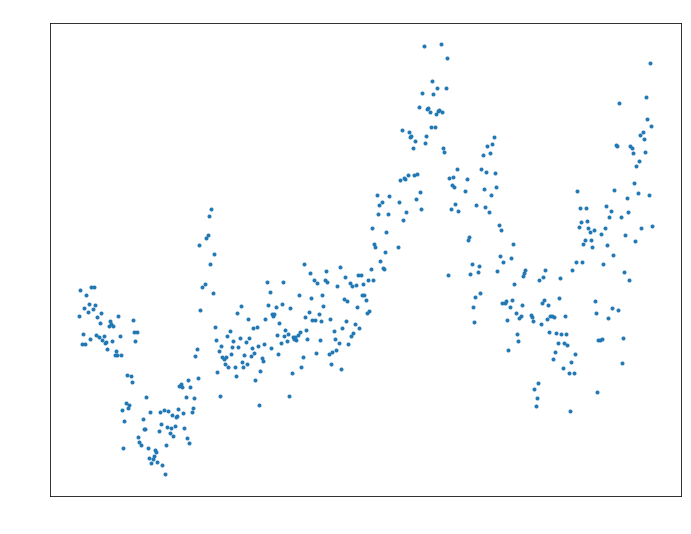

[FluxFinder] Plotting light curve for source 821 (adjusted=True)


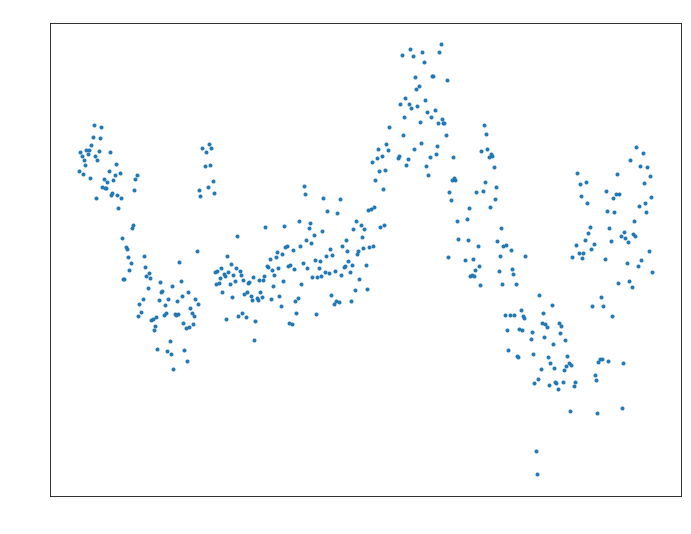

[FluxFinder] Plotting light curve for source 804 (adjusted=True)


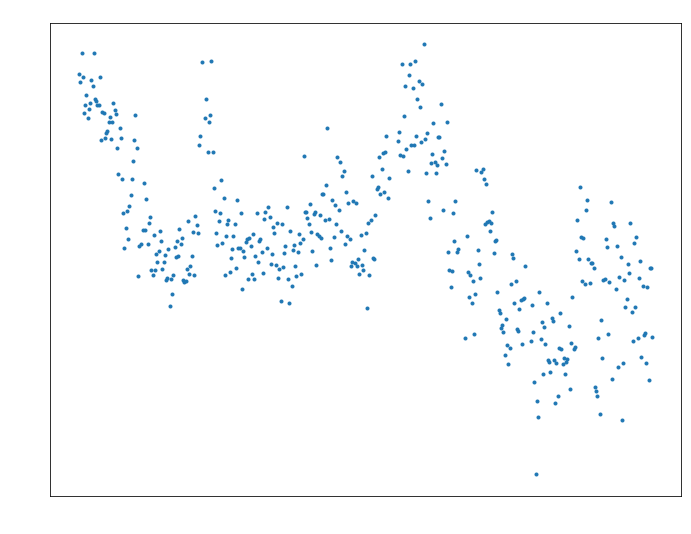

[FluxFinder] Plotting light curve for source 1173 (adjusted=True)


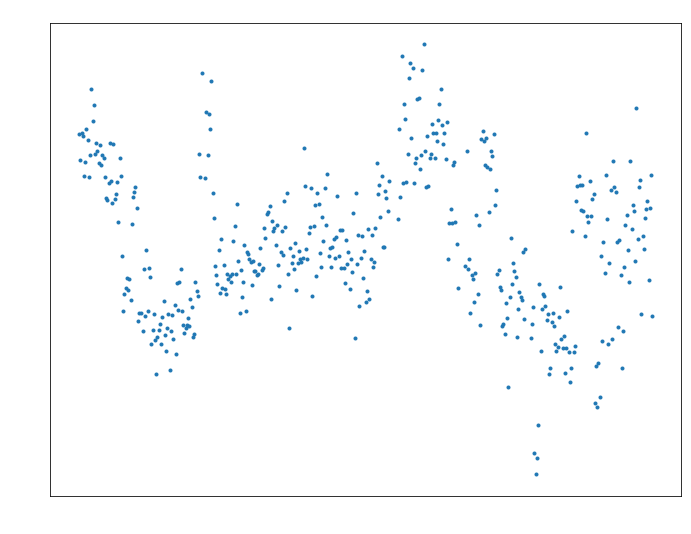

[FluxFinder] Plotting light curve for source 907 (adjusted=True)


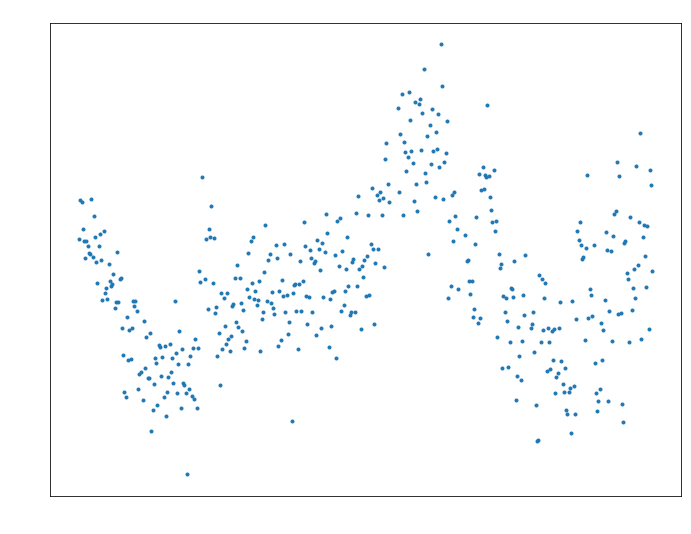

[FluxFinder] Plotting light curve for source 387 (adjusted=True)


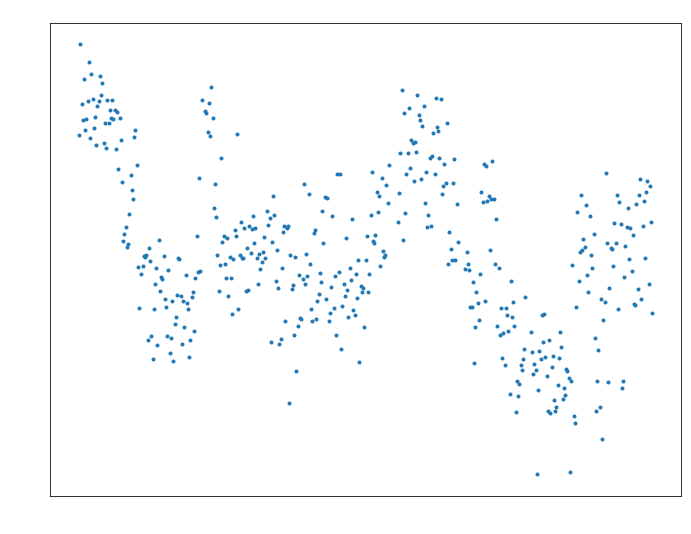

[FluxFinder] Plotting light curve for source 1194 (adjusted=True)


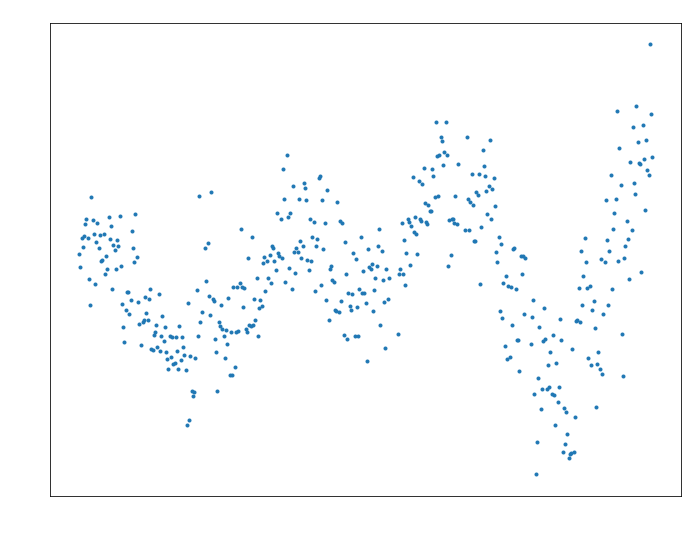

[FluxFinder] Plotting light curve for source 366 (adjusted=True)


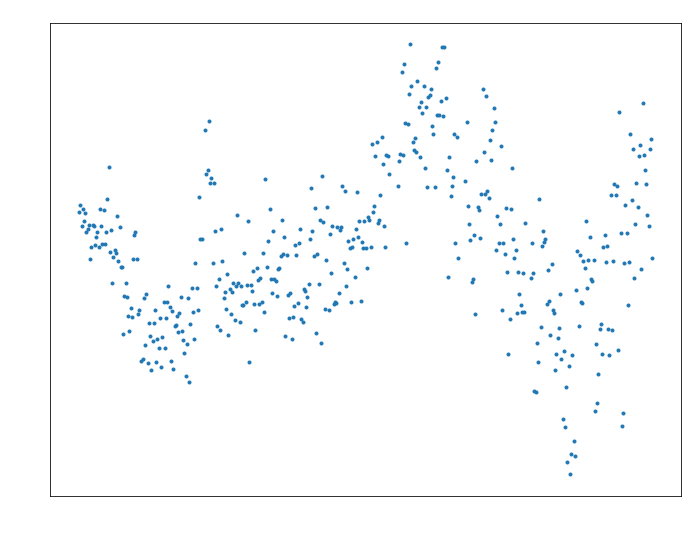

[FluxFinder] Plotting light curve for source 791 (adjusted=True)


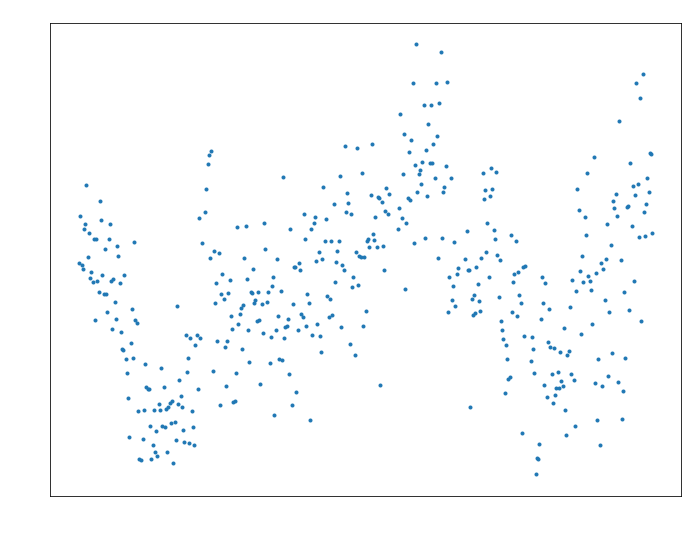

[FluxFinder] Plotting light curve for source 207 (adjusted=True)


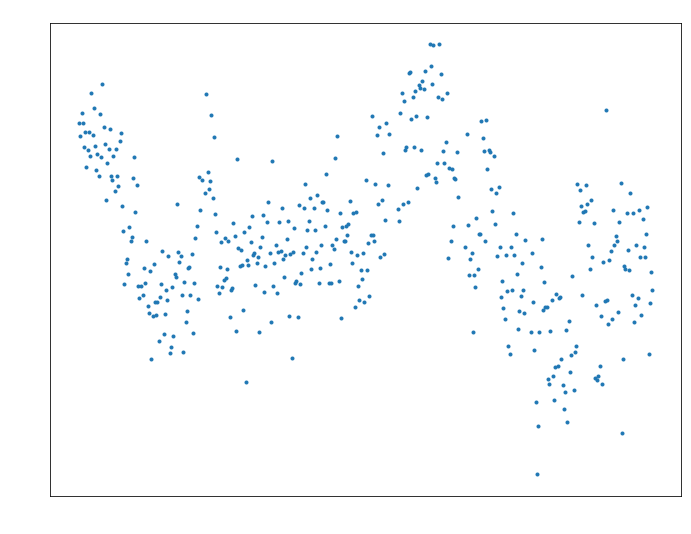

[FluxFinder] Plotting light curve for source 1065 (adjusted=True)


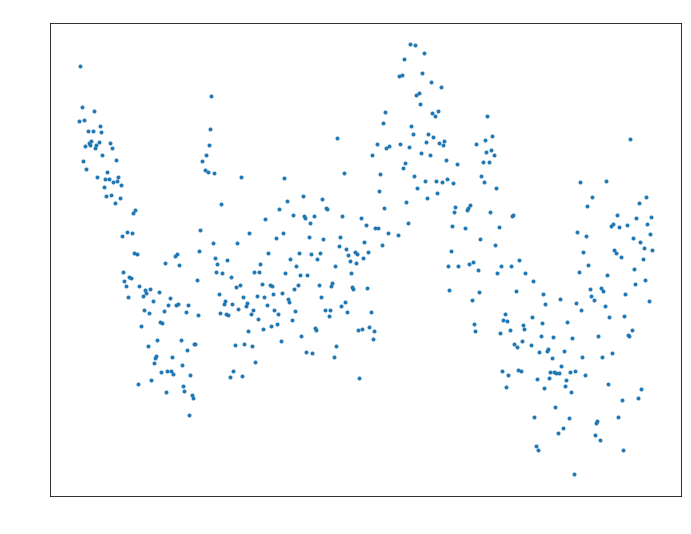

[FluxFinder] Plotting light curve for source 1311 (adjusted=True)


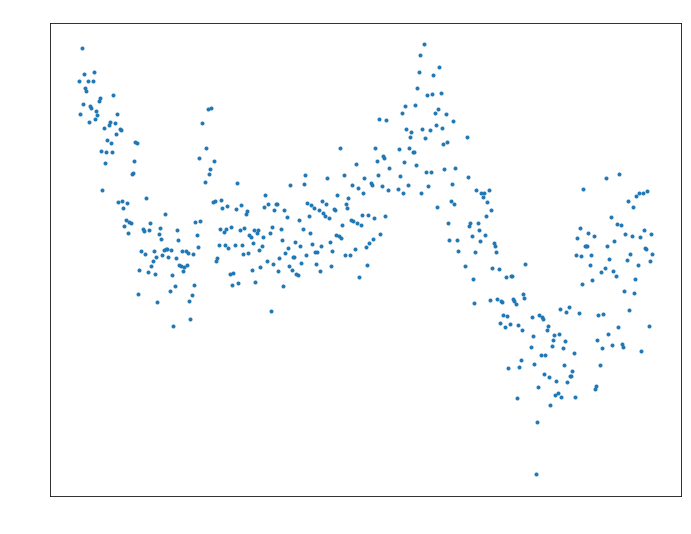

[FluxFinder] Plotting light curve for source 413 (adjusted=True)


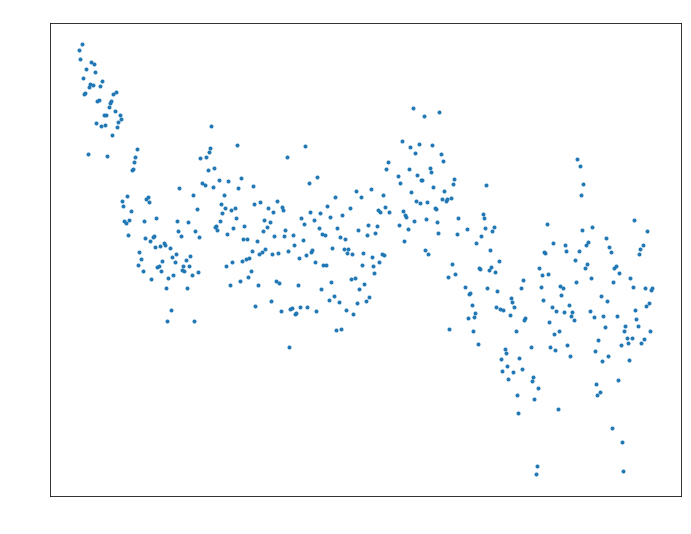

[FluxFinder] Plotting light curve for source 105 (adjusted=True)


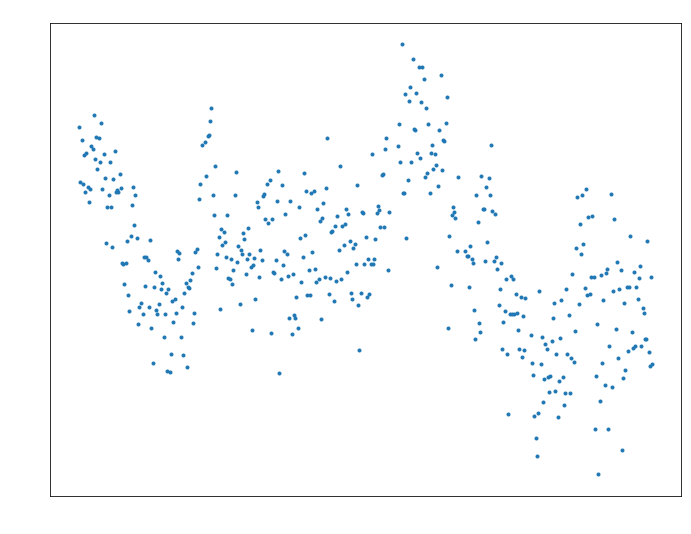

[FluxFinder] Plotting light curve for source 715 (adjusted=True)


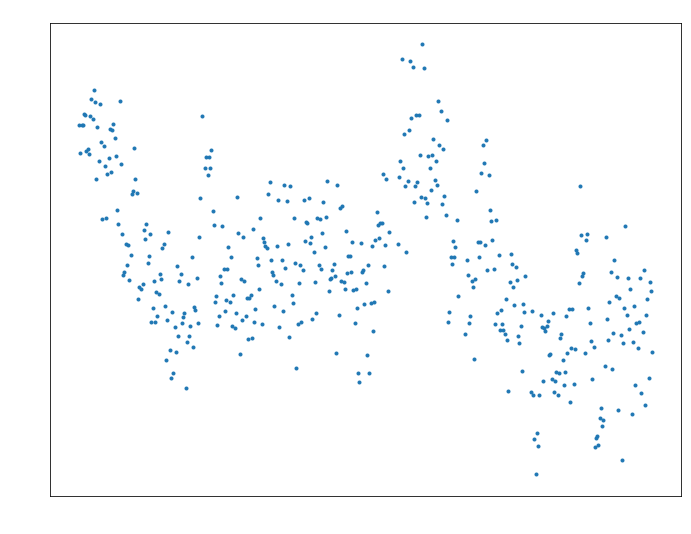

[FluxFinder] Plotting light curve for source 643 (adjusted=True)


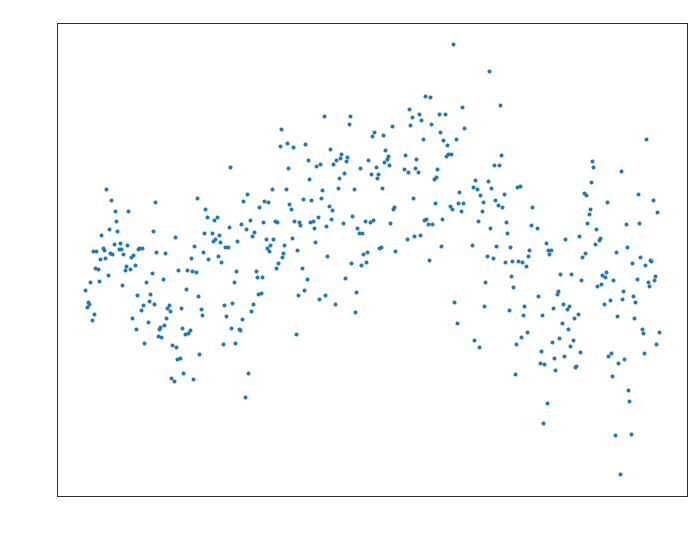

[FluxFinder] Plotting light curve for source 719 (adjusted=True)


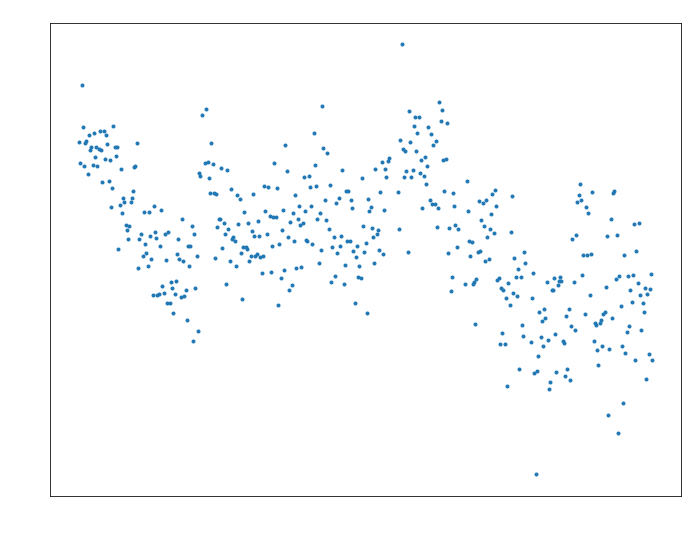

[FluxFinder] Plotting light curve for source 792 (adjusted=True)


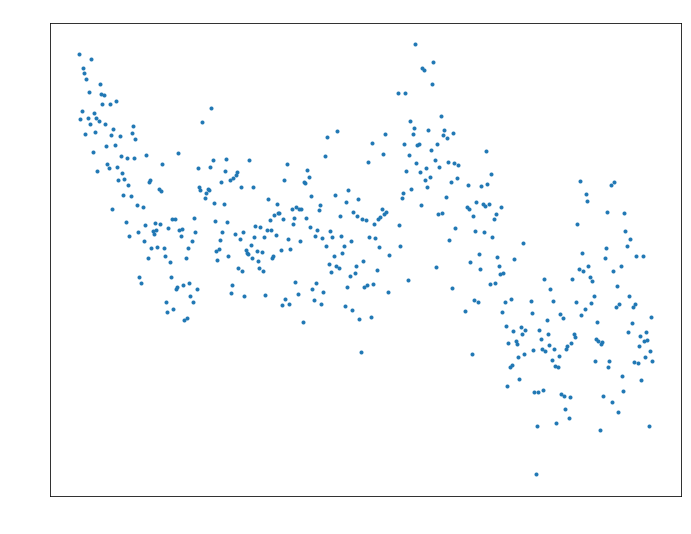

[FluxFinder] Plotting light curve for source 136 (adjusted=True)


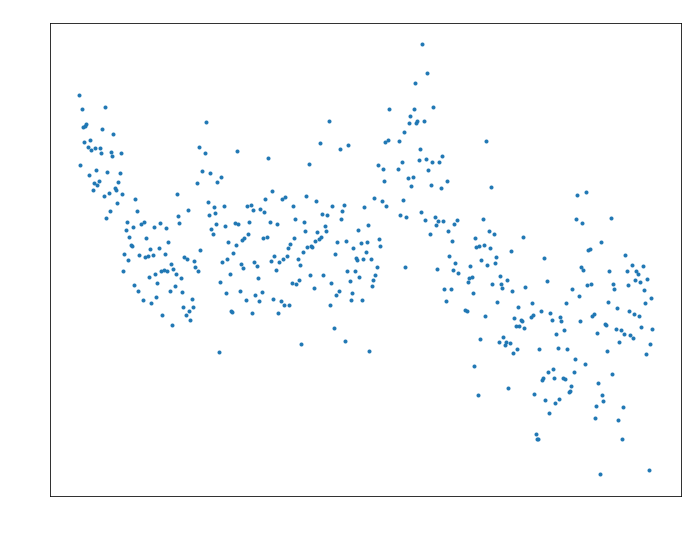

[FluxFinder] Plotting light curve for source 1101 (adjusted=True)


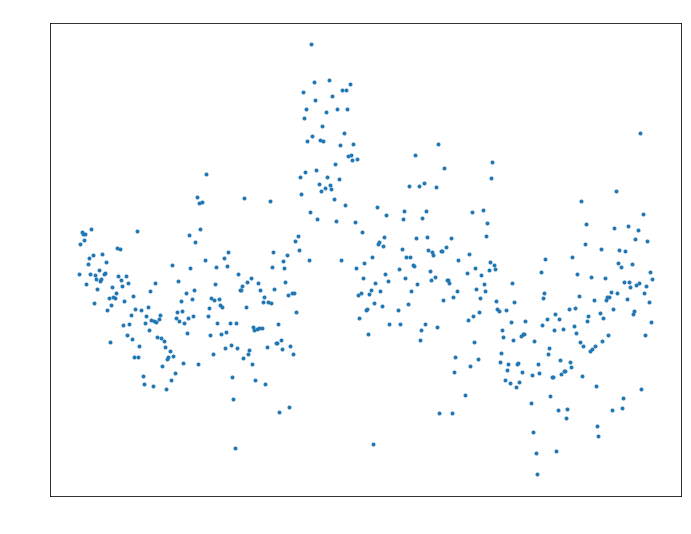

[FluxFinder] Plotting light curve for source 1039 (adjusted=True)


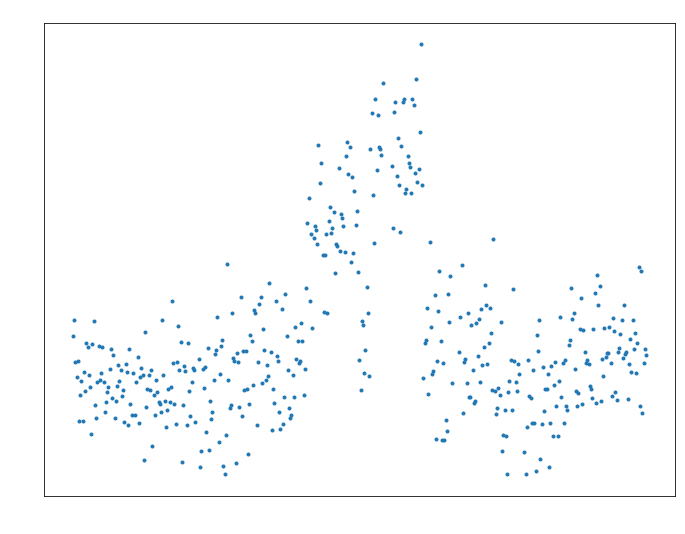

[FluxFinder] Plotting light curve for source 45 (adjusted=True)


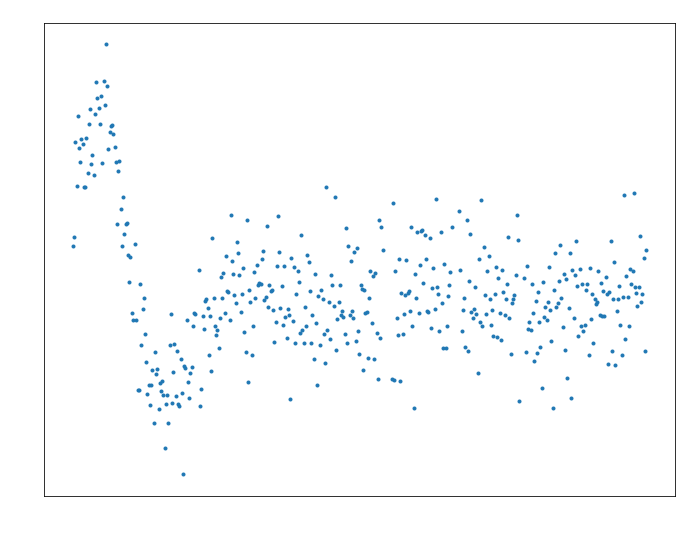

[FluxFinder] Plotting light curve for source 378 (adjusted=True)


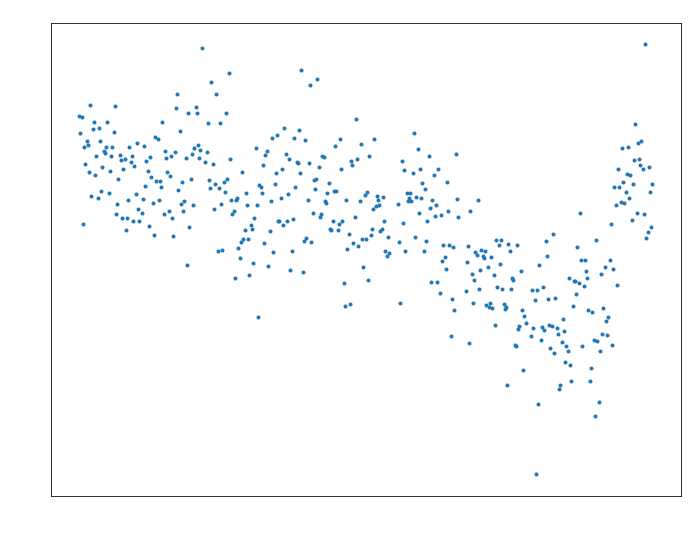

[FluxFinder] Plotting light curve for source 1158 (adjusted=True)


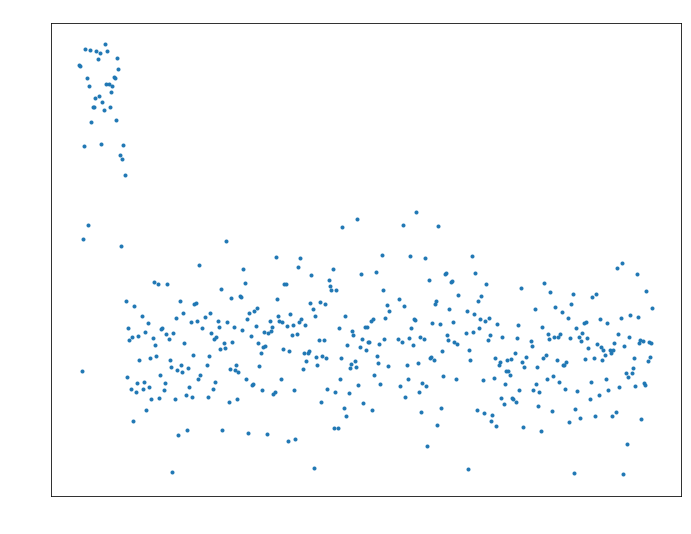

[FluxFinder] Plotting light curve for source 1460 (adjusted=True)


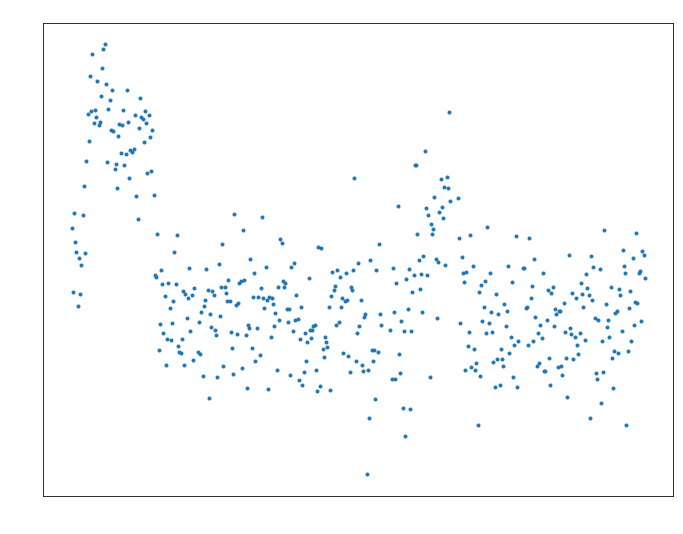

[FluxFinder] Plotting light curve for source 385 (adjusted=True)


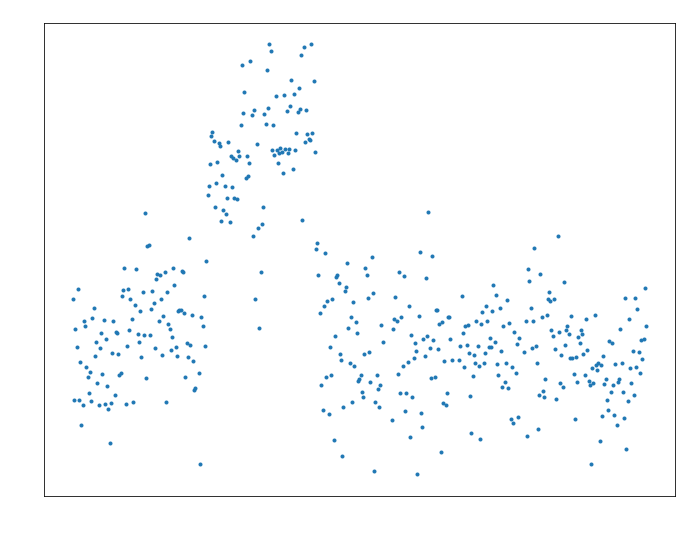

In [17]:
ff.plot_given_light_curves(variable_ids, adjusted=True, show=True, show_errors=False)

[FluxFinder] Creating thumbnails
[DataAnalyser] Creating thumbnail for source id 0045, centroid 1988.552,45.668429


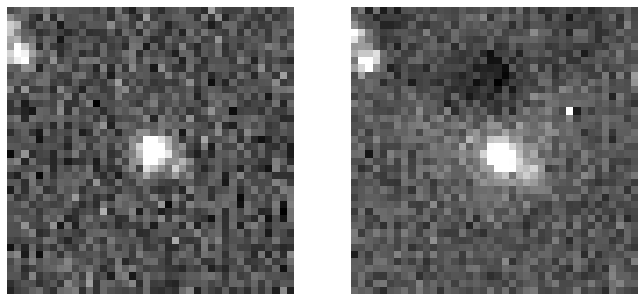

[DataAnalyser] Creating thumbnail for source id 0077, centroid 2374.3738,77.366502


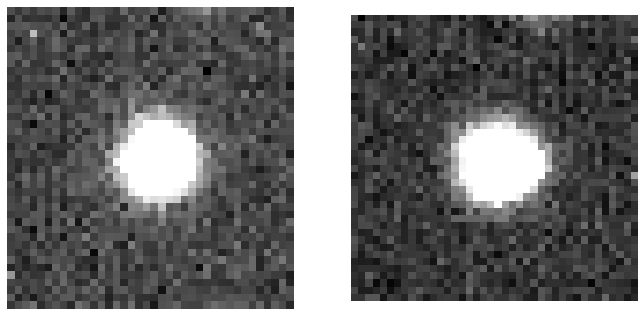

[DataAnalyser] Creating thumbnail for source id 0105, centroid 513.13483,100.55288


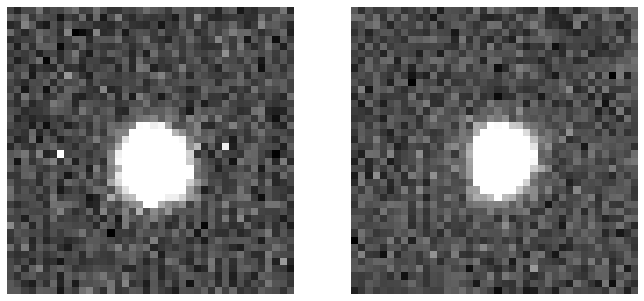

[DataAnalyser] Creating thumbnail for source id 0136, centroid 455.57769,133.00701


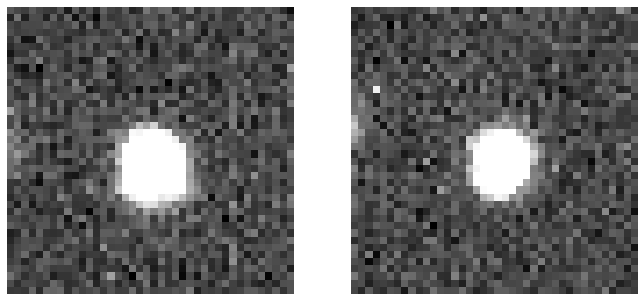

[DataAnalyser] Creating thumbnail for source id 0207, centroid 641.44891,197.80139


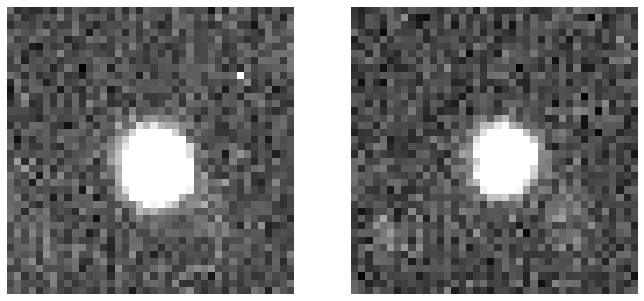

[DataAnalyser] Creating thumbnail for source id 0366, centroid 1930.4113,345.51065


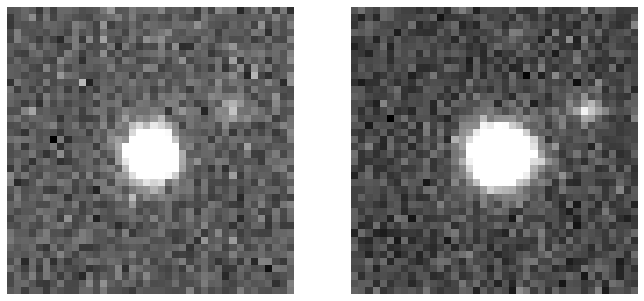

[DataAnalyser] Creating thumbnail for source id 0378, centroid 74.872539,353.58586


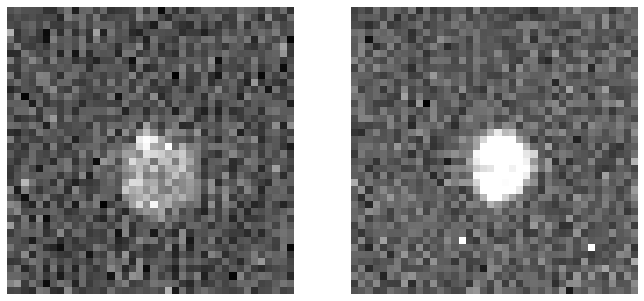

[DataAnalyser] Creating thumbnail for source id 0385, centroid 698.45757,359.54239


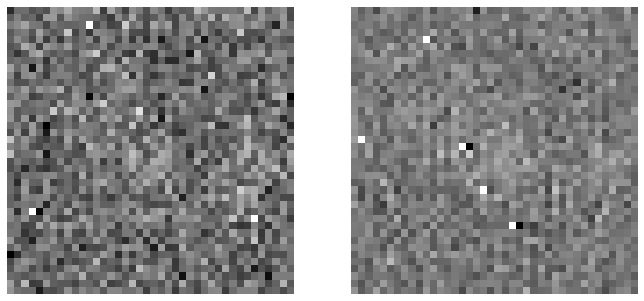

[DataAnalyser] Creating thumbnail for source id 0387, centroid 739.19192,359.63557


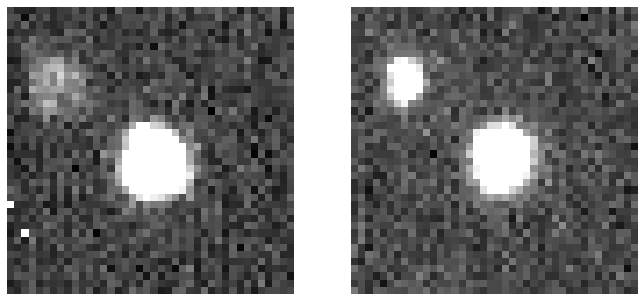

[DataAnalyser] Creating thumbnail for source id 0413, centroid 807.74855,376.13503


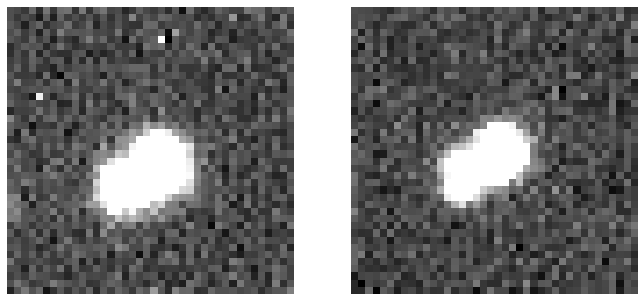

[DataAnalyser] Creating thumbnail for source id 0643, centroid 1103.7002,615.95643


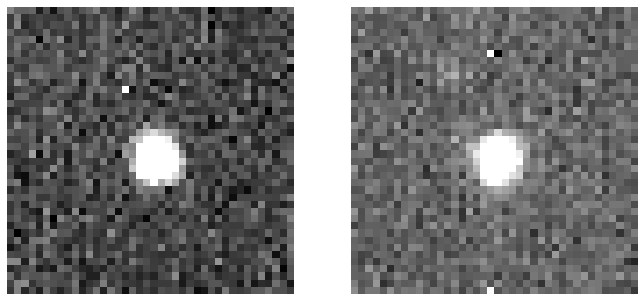

[DataAnalyser] Creating thumbnail for source id 0715, centroid 362.2975,681.86865


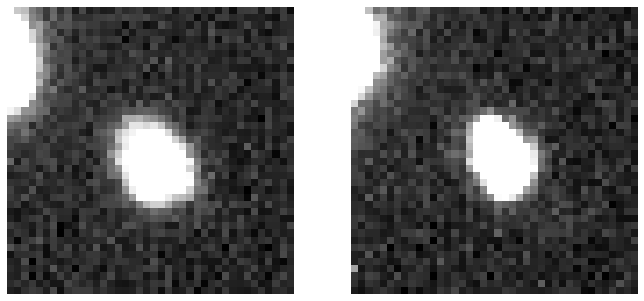

[DataAnalyser] Creating thumbnail for source id 0719, centroid 281.56672,684.57606


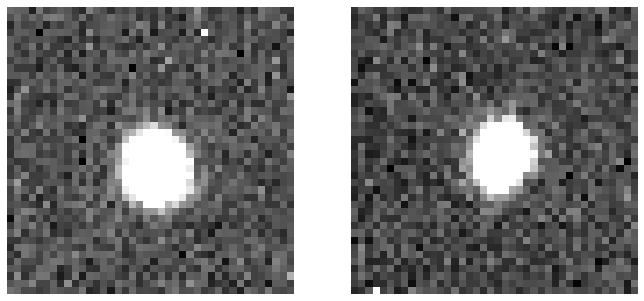

[DataAnalyser] Creating thumbnail for source id 0791, centroid 789.56659,756.12779


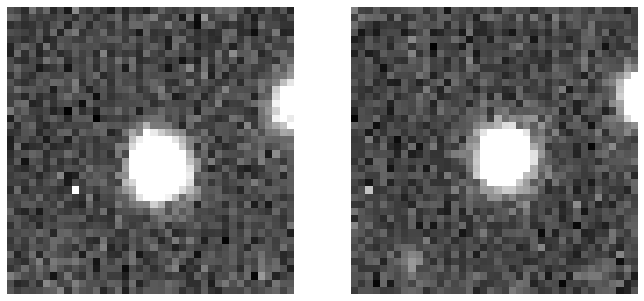

[DataAnalyser] Creating thumbnail for source id 0792, centroid 172.21057,757.05023


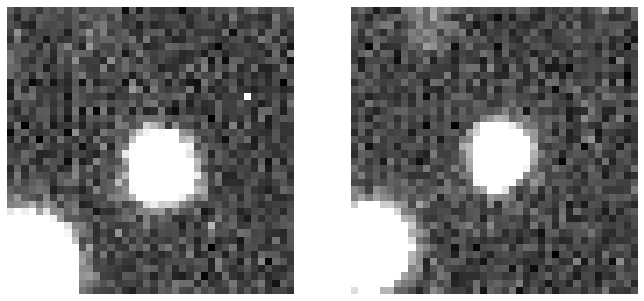

[DataAnalyser] Creating thumbnail for source id 0804, centroid 154.12631,769.98588


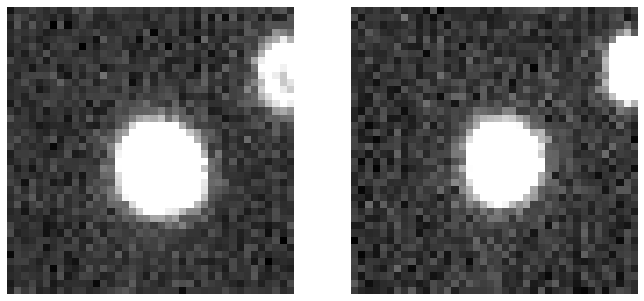

[DataAnalyser] Creating thumbnail for source id 0821, centroid 510.03136,784.62941


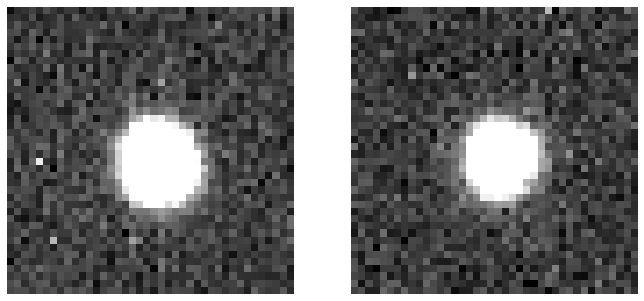

[DataAnalyser] Creating thumbnail for source id 0907, centroid 601.43906,873.9786


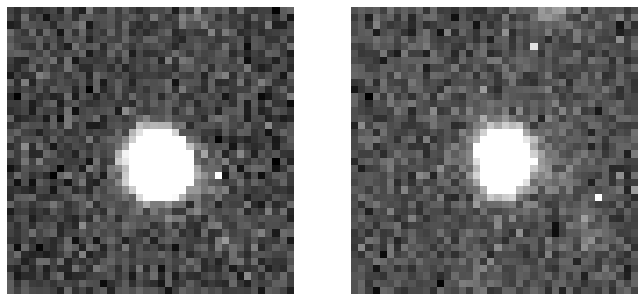

[DataAnalyser] Creating thumbnail for source id 1039, centroid 550.20134,1009.767


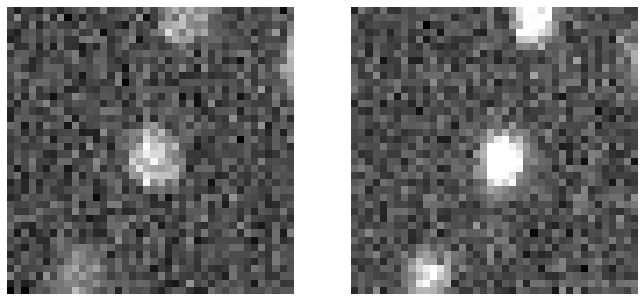

[DataAnalyser] Creating thumbnail for source id 1065, centroid 287.95379,1030.9114


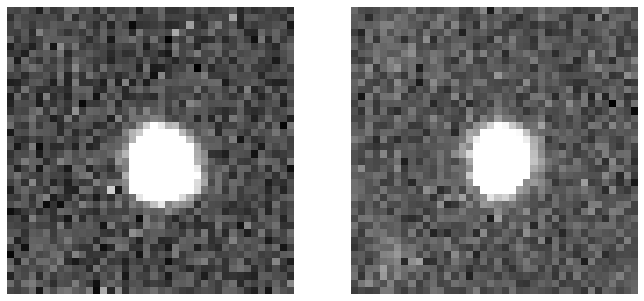

[DataAnalyser] Creating thumbnail for source id 1101, centroid 495.11016,1065.9285


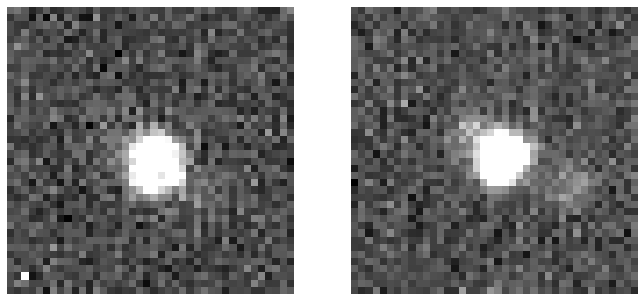

[DataAnalyser] Creating thumbnail for source id 1158, centroid 886.54084,1124.2024


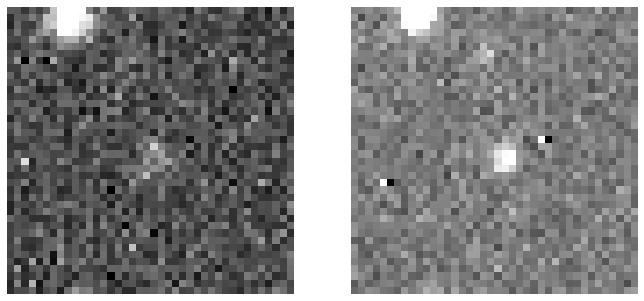

[DataAnalyser] Creating thumbnail for source id 1173, centroid 323.27601,1138.1465


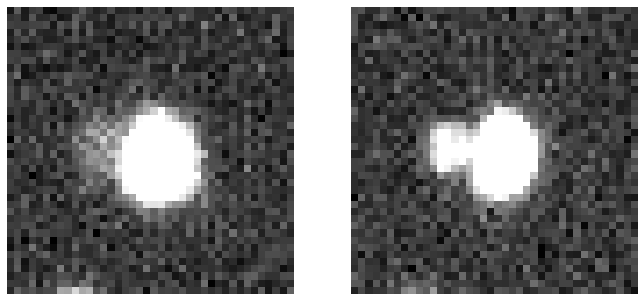

[DataAnalyser] Creating thumbnail for source id 1194, centroid 913.02965,1157.0652


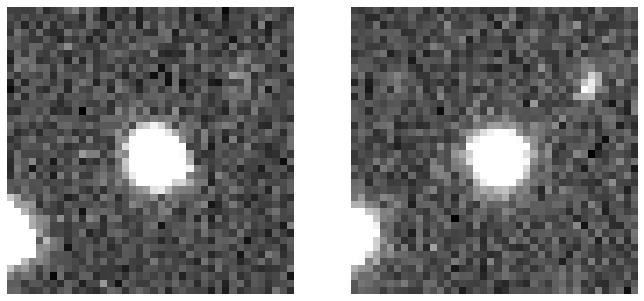

[DataAnalyser] Creating thumbnail for source id 1311, centroid 158.51259,1247.8748


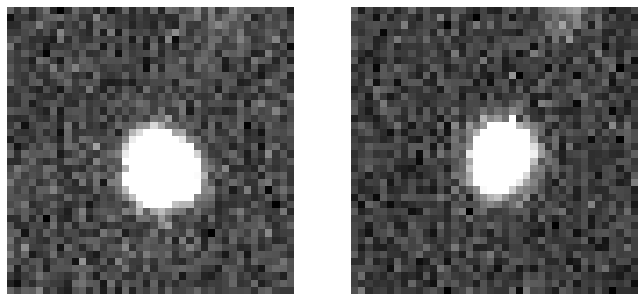

[DataAnalyser] Creating thumbnail for source id 1460, centroid 750.03085,1364.7716


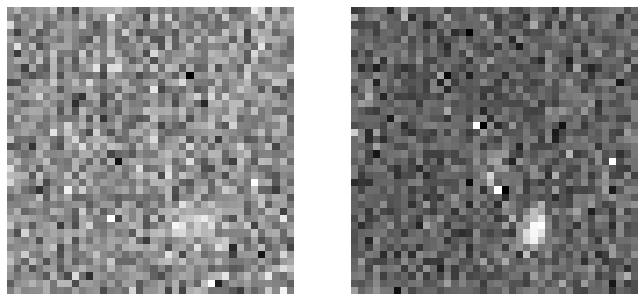

In [16]:
results_table = da.output_results(variable_ids, vd)
ff.create_thumbnails(results_table, show=True)

## Debug land

Use at your own peril.

If you change something in the `pipeline/*.py` then you need to reload the modules differently instead of with the normal imports.

In [1]:
%load_ext autoreload
%autoreload 2

## Imports
import pipeline
from pipeline import *
from pipeline import Pipeline

from datetime import datetime
import os

In [2]:
# REMOVE ME WHEN NOT USING DARK MODE
import matplotlib as mpl
COLOR = "white"
#COLOR = "black"
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

## A4 paper
mpl.rcParams['figure.figsize'] = [11.3, 8.7]

In [3]:
config = Config(
    raw_image_dir = os.path.expanduser("~/mnt/jgt/2022/0301"),
    image_prefix = "l138_0",
    bias_prefix = "bias",
    n_sets = 9,
    fits_extension = ".fits",
    fits_date_format = "%Y.%m.%dT%H:%M:%S.%f",
    has_filter_in_header = False,
)

In [9]:
## DataAnalyser, un-adjusted
da = DataAnalyser(config, adjusted=False)

mean, std, med, n_positive = da.get_means_and_stds()
source_ids = da.get_source_ids()
da.plot_means_and_stds()
    
vd = VariableDetector(config, source_ids, mean, std, med, n_positive, adjusted=False)
exclude_ids = vd.std_dev_search(config.avg_exclude_threshold, adjusted=False)
avg_ids = da.get_ids_for_avg(exclude_ids)

da.make_avg_curve(avg_ids)
ff.plot_avg_light_curve(config.avg_curve_path, show=True)



[DEBUG] listing sources
[DEBUG] listing sources
[VariableDetector] std search: Found 111 variables out of 1743 sources
[DEBUG] listing sources
[DEBUG] Calling `make_avg_curve` in DataAnalyser
[DEBUG] listing sources


NameError: name 'ff' is not defined

In [ ]:
Pipeline.run_existing(config, assume_already_adjusted=True, show_plots=True, show_errors=False)